Michael Weinold, 2020 \\
%remove Based on [luxpy](https://github.com/ksmet1977/luxpy) by [K.A.G. Smet](https://kuleuven.academia.edu/kevinsmet)
Based on colour-science by Colour Developers

In [166]:
# Required Packages
# ========================================
!pip install colour-science
#!pip install matplotlib
#!pip install numpy
#!pip install scipy

In [167]:
# Colour Science
# ========================================
import colour
# Data Science
# ========================================
import numpy as np
import scipy
import json
import matplotlib.pyplot as plt

Loads spectral data from csv file for calculation of CRI. 
Note: For colour-science package, use function [`colour.read_spectral_data_from_csv_file()`](https://colour.readthedocs.io/en/develop/generated/colour.read_spectral_data_from_csv_file.html?highlight=load%20spectral#colour-read-spectral-data-from-csv-file).

In [168]:
spd_raw=colour.read_spectral_data_from_csv_file('spd.csv',fields=['wavelength','intensity'])

In [169]:
print(json.dumps(spd_raw['intensity']))

{"380.0": 1.11, "385.0": 0.8, "390.0": 0.62, "395.0": 0.57, "400.0": 1.48, "405.0": 12.16, "410.0": 2.12, "415.0": 2.7, "420.0": 3.74, "425.0": 5.14, "430.0": 6.75, "435.0": 34.39, "440.0": 14.86, "445.0": 10.4, "450.0": 10.76, "455.0": 10.67, "460.0": 10.11, "465.0": 9.27, "470.0": 8.29, "475.0": 7.29, "480.0": 7.91, "485.0": 16.64, "490.0": 16.73, "495.0": 10.44, "500.0": 5.94, "505.0": 3.34, "510.0": 2.35, "515.0": 1.88, "520.0": 1.59, "525.0": 1.47, "530.0": 1.8, "535.0": 5.71, "540.0": 40.98, "545.0": 73.69, "550.0": 33.61, "555.0": 8.24, "560.0": 3.38, "565.0": 2.47, "570.0": 2.14, "575.0": 4.86, "580.0": 11.45, "585.0": 14.79, "590.0": 12.16, "595.0": 8.97, "600.0": 6.52, "605.0": 8.31, "610.0": 44.12, "615.0": 34.55, "620.0": 12.09, "625.0": 12.15, "630.0": 10.52, "635.0": 4.43, "640.0": 1.95, "645.0": 2.19, "650.0": 3.19, "655.0": 2.77, "660.0": 2.29, "665.0": 2.0, "670.0": 1.52, "675.0": 1.35, "680.0": 1.47, "685.0": 1.79, "690.0": 1.74, "695.0": 1.02, "700.0": 1.14, "705.0":

Note: Functions in color-science are defined only for full nanometer increments (300nm,301nm,...). Interpolates datapoints to return a continous 1D function , which can be evaluated at the proper nanometer increments for later use.

In [170]:
x = list(spd_raw['intensity'].keys())
y = list(spd_raw['intensity'].values())

In [171]:
f = scipy.interpolate.interp1d(x, y, kind='cubic',fill_value="extrapolate")

In [172]:
xnew=np.arange(int(round(x[0])),x[-1],1)
ynewtemp = f(xnew)
ynew = colour.utilities.normalise_maximum(ynewtemp)

Checks quality of interpolation.

In [173]:
print(ynew)

[ 0.0150631   0.01504989  0.01446105  0.01345815  0.01220271  0.01085629
  0.00958044  0.0085367   0.00788662  0.00779174  0.00841362  0.00975226
  0.01116146  0.01183349  0.01096062  0.00773511  0.00208552  0.
  0.          0.00227487  0.02008414  0.0508659   0.0886437   0.12552376
  0.15361232  0.16501561  0.15450624  0.12752237  0.09216854  0.0565493
  0.02876917  0.01489691  0.01285808  0.01854246  0.02783984  0.03663998
  0.04180409  0.04407911  0.04518339  0.04683528  0.05075316  0.05789758
  0.06619799  0.07282605  0.07495338  0.06975166  0.05644681  0.04248188
  0.0373542   0.05056111  0.09159995  0.16532807  0.25804304  0.35140242
  0.4270638   0.46668476  0.45767854  0.410481    0.34128365  0.266278
  0.20165558  0.159929    0.13889523  0.13267238  0.13537853  0.14113177
  0.14514042  0.14697376  0.14729131  0.14675258  0.1460171   0.14560297
  0.14546269  0.14540734  0.145248    0.14479577  0.14390706  0.14261965
  0.14101666  0.13918119  0.13719636  0.13512814  0.1329739   

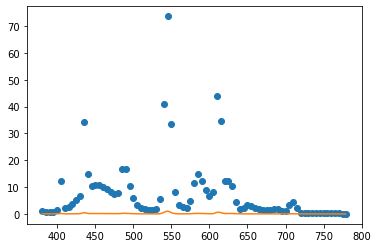

In [174]:
plt.plot(x, y, 'o', xnew, ynew, '-')

In [175]:
spdnormdict = dict(zip(xnew, ynew))
spdnorm = colour.SpectralDistribution(spdnormdict)

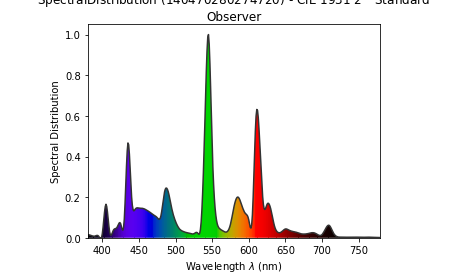

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1c91b34e0>)

In [176]:
colour.plotting.plot_single_sd(spdnorm)

In [177]:
colour.luminous_efficacy(spdnorm)

325.1661392252667

In [178]:
colour.colour_rendering_index(spdnorm)

80.958115082246039

In [179]:
XYZ = colour.sd_to_XYZ(spdnorm)
xy = colour.XYZ_to_xy(XYZ)

In [180]:
colour.temperature.xy_to_CCT_Kang2002(xy)

4863.7264013290405